<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch05_05_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.05. 기초모델 구현 - Adaline
---
* 날짜:
* 이름:

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Adaline 프로세스를 이해한다. 
    - Adaline 알고리즘을 구현한다.
    - 경사하강법에 대해 이해한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
PATH = '/content/drive/MyDrive/[ Work ] NCS/[훈련과정] 딥러닝 프레임워크 실무/과정02.데이터분석/05.머신러닝기반데이터분석'
sys.path.append(PATH)
from data_loader import *

## 클래스 작성
---

In [ ]:
class AdalineGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    self.w = self.seed.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
  
  def model(self, X):
    '''
    X : (n_samples, n_features)
    w : (n_features+1)
    
    return : (n_samples, )
    '''
    return np.dot(X, self.w[:-1])+self.w[-1]

  def predict(self, X):
    return np.where(self.model(X) >= 0.5, 1, 0) 

  def loss(self, y, y_hat):
    return 1/2 * ( (y-y_hat)**2 )
  
  def accuracy(self, y, y_logit):
    return np.count_nonzero(y==y_logit)/len(y)
  
  def evaluate(self, X, y):
    y_hat = self.model(X) # 예측
    loss = ( self.loss(y,y_hat).sum() ) / len(y) # 손실 평균
    
    y_logit = self.predict(X)
    acc = self.accuracy(y, y_logit) # 정확도
    return loss, acc

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):    

      # 최적화 1
      '''
      y_hat = self.model(X) 
      for j, xj in enumerate(X.T): # feature 별 가중치 업데이트
        self.w[j]+= self.lr * np.sum( (y-y_hat)*xj )  # weights 업데이트    
      self.w[-1] += self.lr * np.sum(y-y_hat) #  bias 업데이트   
      '''
      
      # 최적화 2      
      y_hat = self.model(X)
      self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
      self.w[-1] += self.lr * np.sum(y-y_hat)
    
      
      # 평가
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w)


  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    y_pred = self.predict(X)

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## iris 데이터로 분류 진행
---

### **데이터 로드**

In [ ]:
X_train, X_test, y_train, y_test = iris_loader(1, 0)

NameError: ignored

### **학습전 성능 평가**

In [ ]:
model = AdalineGD(lr=0.0001)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
history = model.fit(X_train, y_train, epochs=20)

### **학습 후 성능평가**

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.06163864008290018, 1.0)


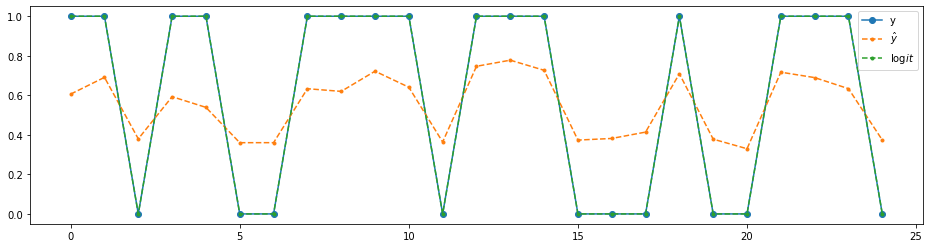

In [ ]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

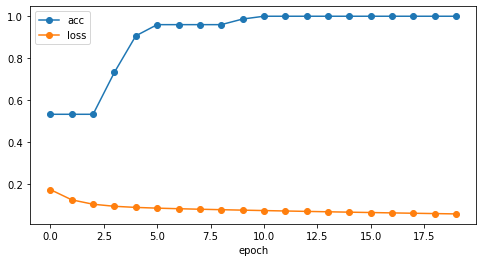

In [ ]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [ ]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = AdalineGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.2  acc: 0.53
[Epoch 1] loss: 0.19  acc: 0.53
[Epoch 2] loss: 0.19  acc: 0.53
[Epoch 3] loss: 0.18  acc: 0.53
[Epoch 4] loss: 0.17  acc: 0.53
[Epoch 5] loss: 0.17  acc: 0.53
[Epoch 6] loss: 0.16  acc: 0.53
[Epoch 7] loss: 0.16  acc: 0.53
[Epoch 8] loss: 0.15  acc: 0.53
[Epoch 9] loss: 0.15  acc: 0.53
===== lr 1e-05 ==== (0.18804517572726745, 0.4)
[Epoch 0] loss: 0.14  acc: 0.53
[Epoch 1] loss: 0.11  acc: 0.53
[Epoch 2] loss: 0.1  acc: 0.63
[Epoch 3] loss: 0.09  acc: 0.85
[Epoch 4] loss: 0.09  acc: 0.95
[Epoch 5] loss: 0.09  acc: 0.96
[Epoch 6] loss: 0.08  acc: 0.96
[Epoch 7] loss: 0.08  acc: 0.97
[Epoch 8] loss: 0.08  acc: 1.0
[Epoch 9] loss: 0.08  acc: 1.0
===== lr 0.0001 ==== (0.07818595303469547, 1.0)
[Epoch 0] loss: 0.88  acc: 0.47
[Epoch 1] loss: 5.89  acc: 0.53
[Epoch 2] loss: 42.31  acc: 0.47
[Epoch 3] loss: 306.09  acc: 0.53
[Epoch 4] loss: 2216.25  acc: 0.47
[Epoch 5] loss: 16048.23  acc: 0.53
[Epoch 6] loss: 116209.05  acc: 0.47
[Epoch 7] loss: 841498.35  acc